In [3]:
import sys
import os
sys.path.insert(0,'..')

import torch
from torch.distributions import Categorical

import numpy as np
import matplotlib.pyplot as plt

from copg_optim.critic_functions import critic_update, get_advantage
from markov_soccer.soccer_state import get_relative_state, get_two_state

import scipy.io

In [4]:
def load_compete(player1,player2): 
    mat = scipy.io.loadmat('../markov_soccer/data/p2_soccer_' + player1 + 'vs' + player2 + '.mat')
    ball_status = mat['ball_status'][0]
    win_mat = mat['win_mat'][0]
    return ball_status, win_mat

In [5]:
def play_matches(Algo1_P1,Algo1_P2,Algo2_P1,Algo2_P2):
    algo11_bs, algo11_wm = load_compete(Algo1_P1,Algo1_P2)
    algo22_bs, algo22_wm = load_compete(Algo2_P1,Algo2_P2)
    algo12_bs, algo12_wm = load_compete(Algo1_P1,Algo2_P2)
    algo21_bs, algo21_wm = load_compete(Algo2_P1,Algo1_P2)

    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(18,3))
    data = np.bincount(algo11_bs)/np.sum(np.bincount(algo11_bs))
    if data[0] == 0:
        ax1.bar(['$A_1$','$B_1$','$A_2$','$B_2$','$A_3$','$B_3$'], data[1:7], width=0.9, align='center')
    else:
        ax1.bar(['N','$A_1$', '$B_1$', '$A_2$', '$B_2$', '$A_3$', '$B_3$'], data[0:7], width=0.9,
               align='center')
    ax1.set_title(Algo1_P1 + ' vs ' + Algo1_P2)
    data = np.bincount(algo22_bs)/np.sum(np.bincount(algo22_bs))
    if data[0] == 0:
        ax2.bar(['$A_1$','$B_1$','$A_2$','$B_2$','$A_3$','$B_3$'], data[1:7], width=0.9, align='center')
    else:
        ax2.bar(['N','$A_1$', '$B_1$', '$A_2$', '$B_2$', '$A_3$', '$B_3$'], data[0:7], width=0.9,
               align='center')
    ax2.set_title(Algo2_P1 + ' vs ' + Algo2_P2)
    data = np.bincount(algo12_bs)/np.sum(np.bincount(algo12_bs))
    if np.size(data)>6:
        if data[0] == 0:
            ax3.bar(['$A_1$','$B_1$','$A_2$','$B_2$','$A_3$','$B_3$'], data[1:7], width=0.9, align='center')
        else:
            ax3.bar(['N','$A_1$', '$B_1$', '$A_2$', '$B_2$','$A_3$','$B_3$'], data[0:7], width=0.9,
                   align='center')
    else:            
        if data[0] == 0:
            ax3.bar(['$A_1$','$B_1$','$A_2$','$B_2$'], data[1:5], width=0.9, align='center')
        else:
            ax3.bar(['N','$A_1$', '$B_1$', '$A_2$', '$B_2$'], data[0:5], width=0.9,
                   align='center')
    ax3.set_title(Algo1_P1 + ' vs ' + Algo2_P2)
    w=0.45
    wm12 = np.array(algo12_wm)
    wm21 = np.array(algo21_wm)
    w1_12 = np.sum(wm12 == 1)/np.size(wm12)
    w2_12 = np.sum(wm12 == 2)/np.size(wm12)
    w1_21 = np.sum(wm21 == 1)/np.size(wm12)
    w2_21 = np.sum(wm21 == 2)/np.size(wm12)
    if w1_12>w2_12:
        pl1 = Algo1_P1
    else:
        pl1 = Algo2_P2
    if w1_21>w2_21:
        pl2 = Algo2_P1
    else:
        pl2 = Algo1_P2
    labels = ['Game1:' + pl1,'Game2:' + pl2]
    x = np.arange(len(labels))
    ax4.bar(x - w/2, [w1_12,w2_12],w*0.95, label='A')
    ax4.bar(x + w/2, [w1_21,w2_21],w*0.95, label='B')
    ax4.set_xticks(x)
    ax4.set_xticklabels(labels)
    ax4.set_title('Win plot')
    plt.legend()
    plt.show()

### CoPG vs GDA

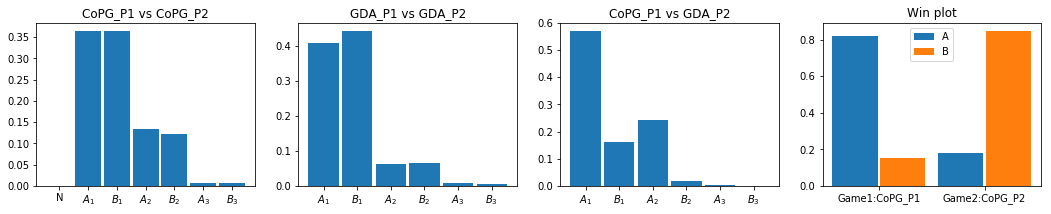

In [6]:
Algo1_P1 = 'CoPG_P1'
Algo1_P2 = 'CoPG_P2'
Algo2_P1 = 'GDA_P1'
Algo2_P2 = 'GDA_P2'
play_matches(Algo1_P1,Algo1_P2,Algo2_P1,Algo2_P2)

### TRCoPO vs TRGDA

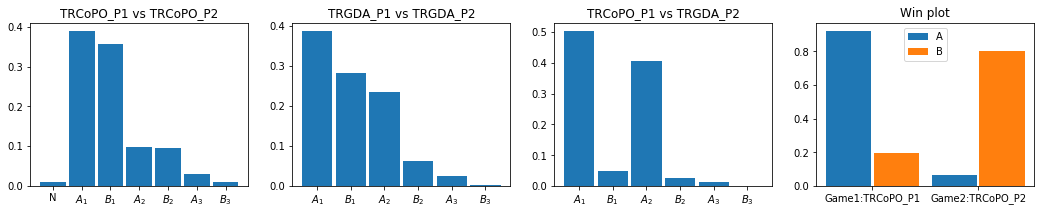

In [7]:
Algo1_P1 = 'TRCoPO_P1'
Algo1_P2 = 'TRCoPO_P2'
Algo2_P1 = 'TRGDA_P1'
Algo2_P2 = 'TRGDA_P2'
play_matches(Algo1_P1,Algo1_P2,Algo2_P1,Algo2_P2)

### CoPG vs TRGDA

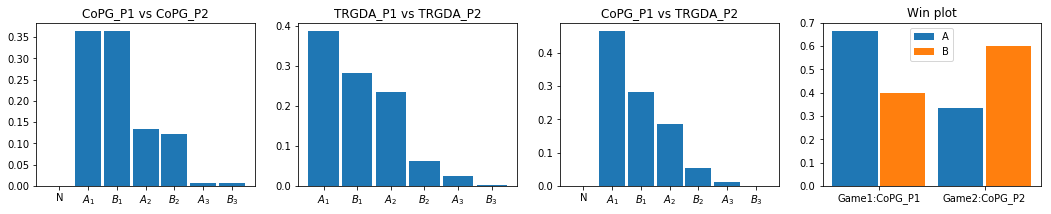

In [8]:
Algo1_P1 = 'CoPG_P1'
Algo1_P2 = 'CoPG_P2'
Algo2_P1 = 'TRGDA_P1'
Algo2_P2 = 'TRGDA_P2'
play_matches(Algo1_P1,Algo1_P2,Algo2_P1,Algo2_P2)

### CoPG vs TRCoPO

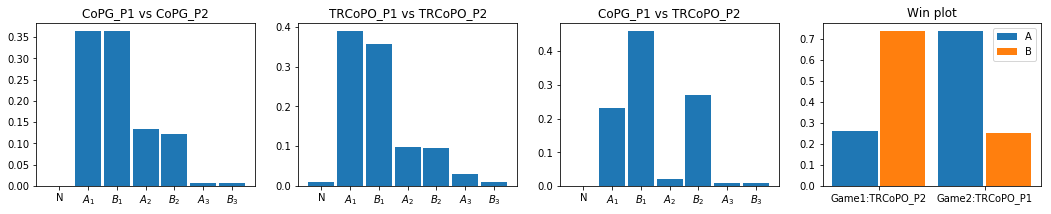

In [9]:
Algo1_P1 = 'CoPG_P1'
Algo1_P2 = 'CoPG_P2'
Algo2_P1 = 'TRCoPO_P1'
Algo2_P2 = 'TRCoPO_P2'
play_matches(Algo1_P1,Algo1_P2,Algo2_P1,Algo2_P2)

### CoPG vs MADDPG

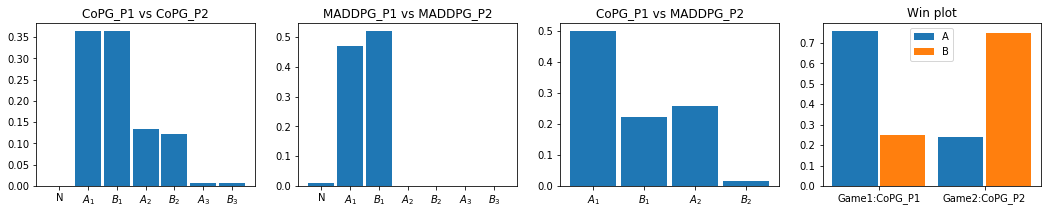

In [10]:
Algo1_P1 = 'CoPG_P1'
Algo1_P2 = 'CoPG_P2'
Algo2_P1 = 'MADDPG_P1'
Algo2_P2 = 'MADDPG_P2'
play_matches(Algo1_P1,Algo1_P2,Algo2_P1,Algo2_P2)

### TRGDA vs GDA

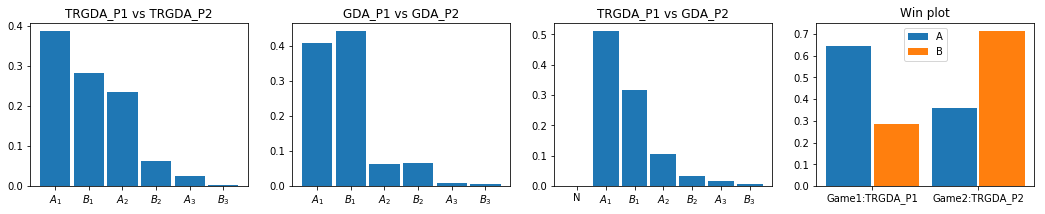

In [11]:
Algo1_P1 = 'TRGDA_P1'
Algo1_P2 = 'TRGDA_P2'
Algo2_P1 = 'GDA_P1'
Algo2_P2 = 'GDA_P2'
play_matches(Algo1_P1,Algo1_P2,Algo2_P1,Algo2_P2)

### TRCoPO vs GDA

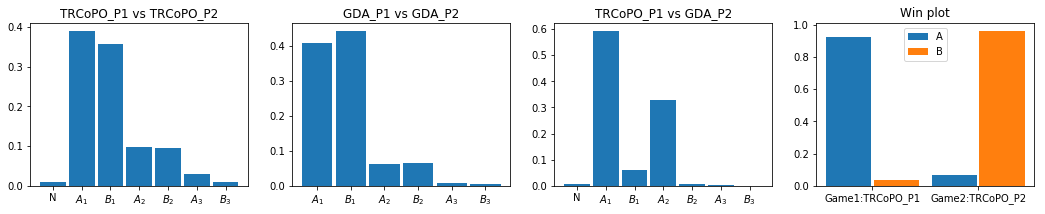

In [13]:
Algo1_P1 = 'TRCoPO_P1'
Algo1_P2 = 'TRCoPO_P2'
Algo2_P1 = 'GDA_P1'
Algo2_P2 = 'GDA_P2'
play_matches(Algo1_P1,Algo1_P2,Algo2_P1,Algo2_P2)